# 모기 발생 지표

## 기상개황 데이터와 모기지수 데이터를 활용하여 다음의 결과를 확인할 수 있습니다.
### 1. 기상 변수와 모기 지수 간의 상관관계
### 2. 계절별 수변부, 주거지, 공원의 모기 지수의 변화
### 3. 월별 모기 지수의 변화
### 4. 평균기온에 따른 모기 지수의 변화
### 5. 강수량에 따른 모기 지수의 변화
### 6. 평균습도에 따른 모기 지수의 변화

### 폰트 설치

첫 실행시 아래 코드 주석 제거후 진행  
폰트 설치되면 다시 주석 처리 후 Ctrl+F9 로 모두 실행

In [39]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# import os
# os.kill(os.getpid(), 9)

### 0. 폰트 설정 및 라이브러리 불러오기

### 1. 데이터 수집

#### 1.1 매번 데이터 파일 업로드하기 번거로우니 구글 드라이브 마운트하기


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.2 폰트설정 및 패키지 불러오기

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

#### 1.3 데이터 불러오기

In [42]:
# 경로 지정
# path = '/content/'
path = '/content/drive/MyDrive/Colab Notebooks/빅데이터처리/Project/data/'

# 서울시 기상개황 정보
raw_weather = pd.read_csv(path + 'seoul_temp.csv')

# 서울시 모기예보제 정보
raw_mosquito = pd.read_csv(path + 'mosquito_occu.csv', encoding='cp949')

# 복사본 만들기
df_weather = raw_weather.copy()
df_mosquito = raw_mosquito.copy()

#### 1.4 데이터 보기

##### 1.4.1 기상개황 데이터 보기

In [43]:
# 기상개황
df_weather.head()

,시점,기온 (℃),기온 (℃).1,기온 (℃).2,기온 (℃).3,기온 (℃).4,강수량 (mm),상대습도 (%),상대습도 (%).1,평균해면기압 (hpa),이슬점온도 (℃),평균운량 (10%),일조시간 (hr),최심신적설 (㎝),바람 (m/s),바람 (m/s).1,바람 (m/s).2
0,시점,평균,평균최고,극점최고,평균최저,극점최저,소계,평균,최소,소계,소계,소계,소계,소계,평균풍속,최대풍속,최대순간풍속
1,2021. 01,-2.4,2.2,13.9,-6.8,-18.6,18.9,58.0,19.0,1024.9,-10.2,3.9,176.4,5.0,2.5,8.7,17.5
2,2021. 02,2.7,7.9,17.4,-2.2,-10.6,7.1,56.0,18.0,1021.5,-6.0,4.0,181.0,4.2,2.6,7.5,15.8
3,2021. 03,9.0,14.8,22.9,4.3,-1.2,110.9,63.0,19.0,1019.7,1.5,4.7,213.0,2.3,2.4,6.9,14.8
4,2021. 04,14.2,19.5,28.2,9.5,3.1,124.1,54.0,18.0,1018.1,4.1,4.8,208.6,-,2.6,7.1,12.5


In [44]:
df_weather.shape

(25, 17)

In [45]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   시점            25 non-null     object
 1   기온 (℃)        25 non-null     object
 2   기온 (℃).1      25 non-null     object
 3   기온 (℃).2      25 non-null     object
 4   기온 (℃).3      25 non-null     object
 5   기온 (℃).4      25 non-null     object
 6   강수량 (mm)      25 non-null     object
 7   상대습도 (%)      25 non-null     object
 8   상대습도 (%).1    25 non-null     object
 9   평균해면기압 (hpa)  25 non-null     object
 10  이슬점온도 (℃)     25 non-null     object
 11  평균운량 (10%)    25 non-null     object
 12  일조시간 (hr)     25 non-null     object
 13  최심신적설 (㎝)     25 non-null     object
 14  바람 (m/s)      25 non-null     object
 15  바람 (m/s).1    25 non-null     object
 16  바람 (m/s).2    25 non-null     object
dtypes: object(17)
memory usage: 3.4+ KB


In [46]:
df_weather.describe()

,시점,기온 (℃),기온 (℃).1,기온 (℃).2,기온 (℃).3,기온 (℃).4,강수량 (mm),상대습도 (%),상대습도 (%).1,평균해면기압 (hpa),이슬점온도 (℃),평균운량 (10%),일조시간 (hr),최심신적설 (㎝),바람 (m/s),바람 (m/s).1,바람 (m/s).2
count,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
unique,25,25,25,25,25,25,24,17,17,23,25,19,25,9,9,20,21
top,시점,평균,평균최고,극점최고,평균최저,극점최저,124.1,55.0,18.0,1025.2,소계,4.2,소계,-,2.1,7.4,12.5
freq,1,1,1,1,1,1,2,4,3,2,1,2,1,16,5,3,2


##### 1.4.2 모기예보제 데이터 보기

In [47]:
# 모기예보제
df_mosquito

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2023-09-24,100.0,46.6,45.0
1,2023-09-23,100.0,45.9,50.5
2,2023-09-22,94.8,39.0,50.3
3,2023-09-21,100.0,41.8,45.8
4,2023-09-20,100.0,41.4,50.0
...,...,...,...,...
5863,1970-01-01,0.0,0.0,0.0
5864,1970-01-01,0.0,0.0,0.0
5865,1970-01-01,0.0,0.0,0.0
5866,1970-01-01,0.0,0.0,0.0


In [48]:
df_mosquito.shape

(5868, 4)

In [49]:
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   5868 non-null   object 
 1   모기지수(수변부)  5856 non-null   float64
 2   모기지수(주거지)  5856 non-null   float64
 3   모기지수(공원)   5856 non-null   float64
dtypes: float64(3), object(1)
memory usage: 183.5+ KB


In [50]:
df_mosquito.describe()

,모기지수(수변부),모기지수(주거지),모기지수(공원)
count,5856.000000,5856.000000,5856.000000
mean,71.695099,63.129935,64.382258
std,173.237051,173.388679,173.364807
min,0.000000,-1.200000,-24.300000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,53.825000,23.925000,22.925000
max,1000.000000,1000.000000,1000.000000


#### 1.5 열 이름 변경

In [51]:
# 기상개황 csv
df_weather.rename(columns = {
    '시점' : '시점',
    '기온 (℃)' : '평균기온',
    "기온 (℃).1" : "평균최고기온",
    "기온 (℃).2" : "극점최고기온",
    "기온 (℃).3" : "평균최저기온",
    "기온 (℃).4" : "극점최저기온",
    "강수량 (mm)" : "강수량",
    "상대습도 (%)" : "평균상대습도",
    "상대습도 (%).1" : "최소상대습도",
    "평균해면기압 (hpa)" : "평균해면기압",
    "이슬점온도 (℃)" : "이슬점온도",
    "평균운량 (10%)" : "평균운량",
    "일조시간 (hr)" : "일조시간",
    "최심신적설 (㎝)" : "최심신적설",
    "바람 (m/s)" : "평균풍속",
    "바람 (m/s).1" : "최대풍속",
    "바람 (m/s).2" : "최대순간풍속"
  }, inplace = True)

# 모기예보제 csv
df_mosquito.rename(columns = {
    '모기지수 발생일' : '시점',
    '모기지수(수변부)' : '수변부',
    '모기지수(주거지)' : '주거지',
    '모기지수(공원)' : '공원',
  }, inplace = True)

df_mosquito.head()

,시점,수변부,주거지,공원
0,2023-09-24,100.0,46.6,45.0
1,2023-09-23,100.0,45.9,50.5
2,2023-09-22,94.8,39.0,50.3
3,2023-09-21,100.0,41.8,45.8
4,2023-09-20,100.0,41.4,50.0


### 2. 데이터 가공

#### 2.1 데이터 전처리

##### 2.1.1 기상 데이터

In [52]:
# 기상개황 데이터 전처리

# 첫 번째 행을 제외한 나머지 행 선택
df_weather = df_weather.iloc[1:]

# 날짜로 형변환
df_weather['시점'] = pd.to_datetime(df_weather['시점'])

# 2021년 2월 1일 이후의 데이터만 선택
start_date = '2021-02-01'
df_weather = df_weather[df_weather['시점'] >= start_date]

# 결측치 처리
df_weather = df_weather.dropna()

# 최심신적설 '-' 데이터 0으로 대체
df_weather['최심신적설'] = df_weather['최심신적설'].replace('-', 0)

# 기상 데이터들의 월(Month) 데이터 추출
df_weather['월'] = df_weather['시점'].dt.month

<ipython-input-52-23088d7f1d4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['시점'] = pd.to_datetime(df_weather['시점'])


##### 2.1.2 기상 데이터 확인

In [53]:
df_weather.head()

,시점,평균기온,평균최고기온,극점최고기온,평균최저기온,극점최저기온,강수량,평균상대습도,최소상대습도,평균해면기압,이슬점온도,평균운량,일조시간,최심신적설,평균풍속,최대풍속,최대순간풍속,월
2,2021-02-01,2.7,7.9,17.4,-2.2,-10.6,7.1,56.0,18.0,1021.5,-6.0,4.0,181.0,4.2,2.6,7.5,15.8,2
3,2021-03-01,9.0,14.8,22.9,4.3,-1.2,110.9,63.0,19.0,1019.7,1.5,4.7,213.0,2.3,2.4,6.9,14.8,3
4,2021-04-01,14.2,19.5,28.2,9.5,3.1,124.1,54.0,18.0,1018.1,4.1,4.8,208.6,0,2.6,7.1,12.5,4
5,2021-05-01,17.1,21.9,30.8,12.8,7.3,183.1,68.0,25.0,1008.9,10.3,5.6,203.7,0,2.4,8.4,16.0,5
6,2021-06-01,22.8,27.6,31.6,18.9,13.3,104.6,73.0,36.0,1007.5,17.2,5.6,185.5,0,2.2,7.8,15.0,6


##### 2.1.3 모기지수 데이터

In [68]:
# 모기 예보 데이터 전처리

# 날짜로 형변환
df_mosquito['시점'] = pd.to_datetime(df_mosquito['시점'])

# 모기지수 데이터들의 월(Month) 데이터 추출
df_mosquito['월'] = df_mosquito['시점'].dt.month

# 2021년 2월 1일 이후의 데이터만 선택
start_date = '2021-02-01'
df_mosquito = df_mosquito[df_mosquito['시점'] >= start_date]

# 결측치 처리
df_mosquito = df_mosquito.dropna()

,시점,수변부,주거지,공원,월
0,2023-09-24,100.0,46.6,45.0,9
1,2023-09-23,100.0,45.9,50.5,9
2,2023-09-22,94.8,39.0,50.3,9
3,2023-09-21,100.0,41.8,45.8,9
4,2023-09-20,100.0,41.4,50.0,9


In [55]:
# 기상개황 데이터 형변환
df_weather['시점'] = pd.to_datetime(df_weather['시점'])
df_weather['평균기온'] = df_weather['평균기온'].astype(float)
df_weather['평균최고기온'] = df_weather['평균최고기온'].astype(float)
df_weather['극점최고기온'] = df_weather['극점최고기온'].astype(float)
df_weather['평균최저기온'] = df_weather['평균최저기온'].astype(float)
df_weather['극점최저기온'] = df_weather['극점최저기온'].astype(float)
df_weather['강수량'] = df_weather['강수량'].astype(float)
df_weather['평균상대습도'] = df_weather['평균상대습도'].astype(float)
df_weather['최소상대습도'] = df_weather['최소상대습도'].astype(float)
df_weather['평균해면기압'] = df_weather['평균해면기압'].astype(float)
df_weather['이슬점온도'] = df_weather['이슬점온도'].astype(float)
df_weather['평균운량'] = df_weather['평균운량'].astype(float)
df_weather['일조시간'] = df_weather['일조시간'].astype(float)
df_weather['최심신적설'] = df_weather['최심신적설'].astype(float)
df_weather['평균풍속'] = df_weather['평균풍속'].astype(float)
df_weather['최대풍속'] = df_weather['최대풍속'].astype(float)
df_weather['최대순간풍속'] = df_weather['최대순간풍속'].astype(float)

# 모기예보제 데이터 형변환
df_mosquito['시점'] = pd.to_datetime(df_mosquito['시점'])
df_mosquito['수변부'] = df_mosquito['수변부'].astype(float)
df_mosquito['주거지'] = df_mosquito['주거지'].astype(float)
df_mosquito['공원'] = df_mosquito['공원'].astype(float)

##### 2.1.4 모기지수 데이터 확인

In [56]:
df_mosquito

,시점,수변부,주거지,공원,월
0,2023-09-24,100.0,46.6,45.0,9
1,2023-09-23,100.0,45.9,50.5,9
2,2023-09-22,94.8,39.0,50.3,9
3,2023-09-21,100.0,41.8,45.8,9
4,2023-09-20,100.0,41.4,50.0,9
...,...,...,...,...,...
993,2021-02-05,0.0,0.0,0.0,2
994,2021-02-04,0.0,0.0,0.0,2
995,2021-02-03,0.0,6.5,0.0,2
996,2021-02-02,0.0,1.3,0.0,2


##### 2.1.5 기상 데이터와 모기 지수 데이터를 월(Month)의 시점을 기준으로 병합

In [57]:
# 기상 데이터와 모기 지수 데이터를 월(Month)의 시점을 기준으로 병합
avg_weather_df = df_weather.groupby('월').mean(numeric_only=True).reset_index()
avg_mosquito_df = df_mosquito.groupby('월').mean(numeric_only=True).reset_index()

merged_df = pd.merge(avg_weather_df, avg_mosquito_df, on=['월'], how='inner')

# 계절 구분
def get_season(month):
    if 3 <= month < 6:
        return '봄'
    elif 6 <= month < 9:
        return '여름'
    elif 9 <= month < 12:
        return '가을'
    else:
        return '겨울'

# 계절 열 생성
merged_df['계절'] = merged_df['월'].apply(get_season)

# 열 순서 재정의
selected_columns = ['월', '계절', '수변부', '주거지', '공원', '평균기온', '평균최고기온', '극점최고기온', '평균최저기온',
                    '극점최저기온', '강수량', '평균상대습도', '최소상대습도', '평균해면기압', '이슬점온도', '평균운량',
                    '일조시간', '최심신적설', '평균풍속', '최대풍속', '최대순간풍속']

# 기상 데이터프레임 재정의
merged_df = merged_df[selected_columns]

##### 2.1.6 병합된 데이터 보기

In [58]:
merged_df.head()

,월,계절,수변부,주거지,공원,평균기온,평균최고기온,극점최고기온,평균최저기온,극점최저기온,...,평균상대습도,최소상대습도,평균해면기압,이슬점온도,평균운량,일조시간,최심신적설,평균풍속,최대풍속,최대순간풍속
0,1,겨울,2.661905,0.179365,0.000000,-2.20,2.60,8.40,-6.20,-11.30,...,55.0,21.0,1025.20,-10.40,3.10,206.9,3.50,2.20,7.60,13.90
1,2,겨울,4.184706,1.690588,0.129412,0.80,5.85,14.45,-3.75,-10.65,...,55.5,19.5,1023.70,-7.80,3.60,192.4,3.75,2.60,7.45,15.15
2,3,봄,24.717347,10.590816,6.022449,8.35,13.75,21.20,3.75,-2.10,...,62.5,17.0,1018.50,0.80,4.95,193.0,1.50,2.45,7.85,16.65
3,4,봄,55.759140,23.173118,24.934409,14.50,20.05,28.45,9.75,3.30,...,54.5,17.5,1017.45,4.45,4.45,227.5,0.00,2.65,7.75,13.50
4,5,봄,80.123958,32.800000,29.858333,18.10,23.45,30.75,13.35,7.60,...,61.5,20.5,1010.35,9.70,4.75,253.0,0.00,2.50,8.00,15.05


### 3. 상관관계 분석

#### 3.1 기상 변수와 모기 지수 간의 상관관계 분석

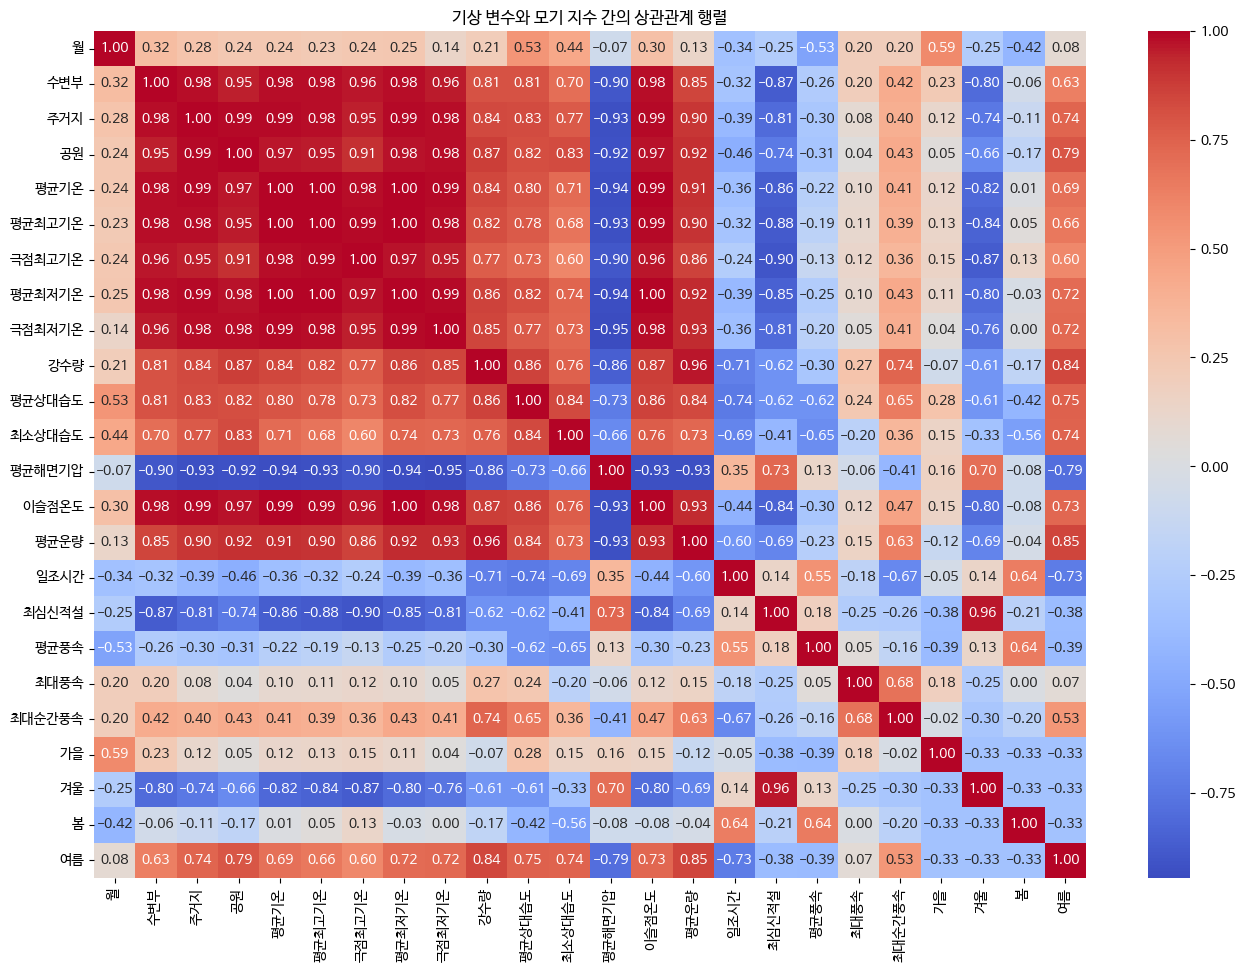

In [59]:
# 기상 변수와 모기 지수 간의 상관관계 분석
# 계절을 원-핫 인코딩
season_dummies = pd.get_dummies(merged_df['계절'])

# 기존 데이터프레임과 합치기
merged_df_onehot = pd.concat([merged_df, season_dummies], axis=1)

# 상관관계 행렬 계산
correlation_matrix = merged_df_onehot.corr(numeric_only=True)

# 시각화
plt.figure(figsize=(16, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('기상 변수와 모기 지수 간의 상관관계 행렬')
plt.show()


#### 3.2 (0.8 이상의 상관관계를 가진 항목만 필터링)

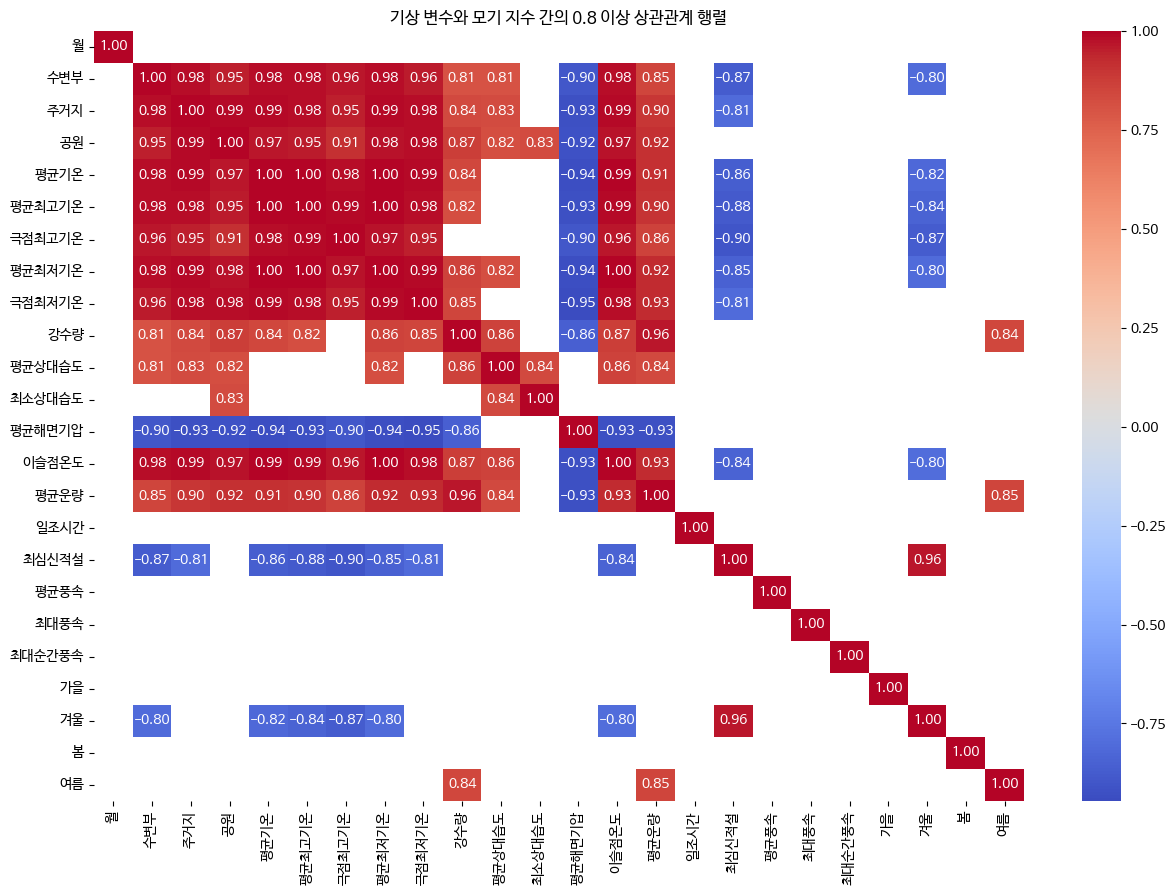

In [70]:
# 0.8 이상의 상관관계를 가진 항목만 필터링
high_corr_matrix = correlation_matrix[correlation_matrix.abs() >= 0.8]

# 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('기상 변수와 모기 지수 간의 0.8 이상 상관관계 행렬')
plt.show()

### 4. 시각화

#### 4.1 계절별 모기 지수 평균 계산

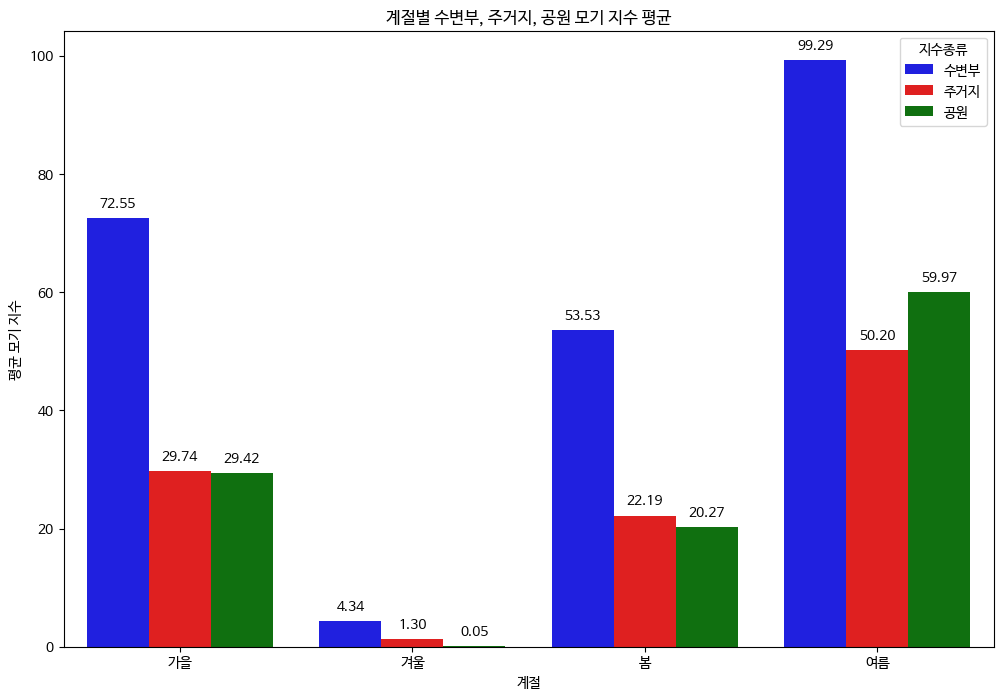

In [61]:
# 계절별 모기 지수 평균 계산
avg_mosquito_by_season = merged_df.groupby('계절').agg({'수변부': 'mean', '주거지': 'mean', '공원': 'mean'}).reset_index()

# 데이터 정리 (melt)
avg_mosquito_melted = pd.melt(avg_mosquito_by_season, id_vars='계절', var_name='지수종류', value_name='평균모기지수')


# RGB 색상 설정
colors = ['blue', 'red', 'green']

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='계절', y='평균모기지수', hue='지수종류', data=avg_mosquito_melted, palette=colors)

# 상단에 평균 값 표시
for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('계절별 수변부, 주거지, 공원 모기 지수 평균')
plt.xlabel('계절')
plt.ylabel('평균 모기 지수')
plt.legend(title='지수종류')
plt.show()

#### 4.2 월별 모기 지수의 변화

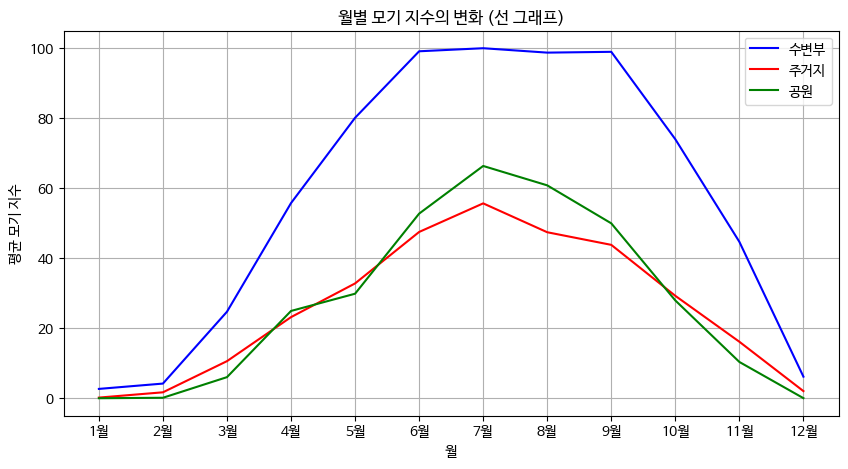

In [62]:
# 월별 모기 지수의 변화
monthly_mosquito = merged_df[['월', '수변부', '주거지', '공원']]

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 선 그래프 (수변부)
plt.plot(monthly_mosquito.index, monthly_mosquito['수변부'], label='수변부', color='blue')

# 선 그래프 (주거지)
plt.plot(monthly_mosquito.index, monthly_mosquito['주거지'], label='주거지', color='red')

# 선 그래프 (공원)
plt.plot(monthly_mosquito.index, monthly_mosquito['공원'], label='공원', color='green')

# 축 및 레이블 설정
plt.title('월별 모기 지수의 변화 (선 그래프)')
plt.xlabel('월')
plt.ylabel('평균 모기 지수')

# X 축에 월 표시
plt.xticks(monthly_mosquito.index, labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])

# 범례 설정
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


#### 4.3 평균기온에 따른 모기 지수의 변화

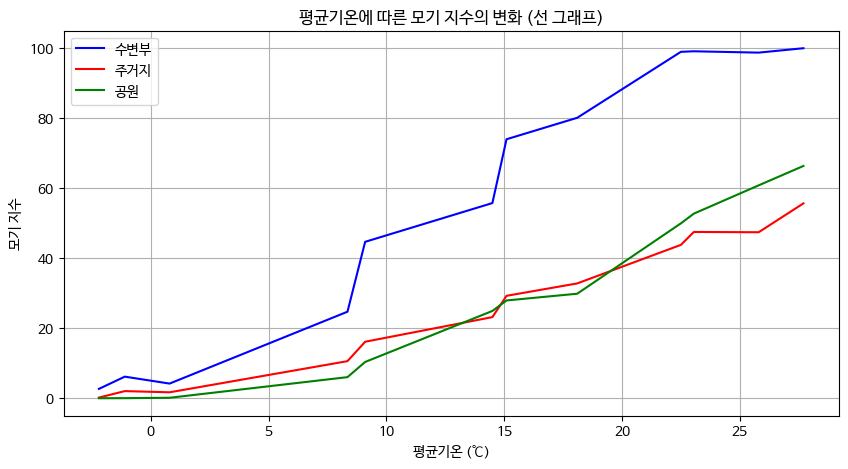

In [63]:
# 평균기온에 따른 모기 지수의 변화
avg_temp_mosquito = merged_df[['평균기온', '수변부', '주거지', '공원']].sort_values(by='평균기온')

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 선 그래프 (수변부)
plt.plot(avg_temp_mosquito['평균기온'], avg_temp_mosquito['수변부'], label='수변부', color='blue')

# 선 그래프 (주거지)
plt.plot(avg_temp_mosquito['평균기온'], avg_temp_mosquito['주거지'], label='주거지', color='red')

# 선 그래프 (공원)
plt.plot(avg_temp_mosquito['평균기온'], avg_temp_mosquito['공원'], label='공원', color='green')

# 축 및 레이블 설정
plt.title('평균기온에 따른 모기 지수의 변화 (선 그래프)')
plt.xlabel('평균기온 (℃)')
plt.ylabel('모기 지수')

# 범례 설정
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


#### 4.4 강수량에 따른 모기 지수의 변화

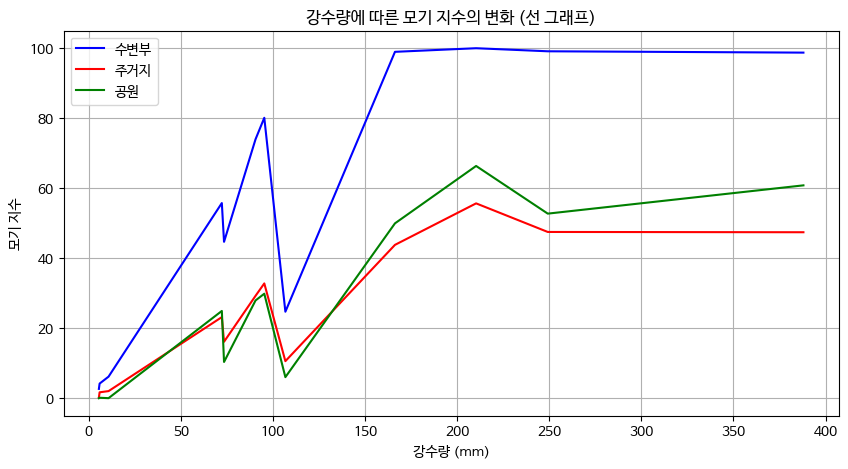

In [64]:
# 강수량에 따른 모기 지수의 변화
avg_rainfall_df = merged_df[['강수량', '수변부', '주거지', '공원']].sort_values(by='강수량')

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 선 그래프 (수변부)
plt.plot(avg_rainfall_df['강수량'], avg_rainfall_df['수변부'], label='수변부', color='blue')

# 선 그래프 (주거지)
plt.plot(avg_rainfall_df['강수량'], avg_rainfall_df['주거지'], label='주거지', color='red')

# 선 그래프 (공원)
plt.plot(avg_rainfall_df['강수량'], avg_rainfall_df['공원'], label='공원', color='green')

# 축 및 레이블 설정
plt.title('강수량에 따른 모기 지수의 변화 (선 그래프)')
plt.xlabel('강수량 (mm)')
plt.ylabel('모기 지수')

# 범례 설정
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

#### 4.5 평균습도에 따른 모기 지수의 변화

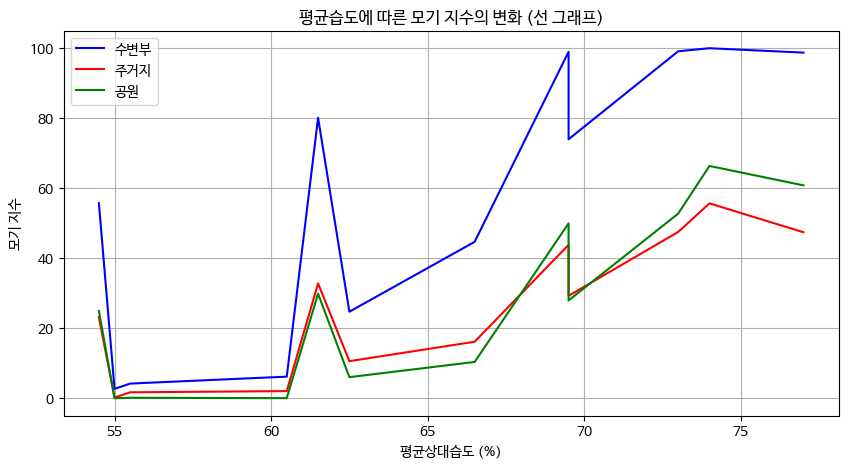

In [65]:
# 평균습도에 따른 모기 지수의 변화
avg_humidity_df = merged_df[['평균상대습도', '수변부', '주거지', '공원']].sort_values(by='평균상대습도')

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 선 그래프 (수변부)
plt.plot(avg_humidity_df['평균상대습도'], avg_humidity_df['수변부'], label='수변부', color='blue')

# 선 그래프 (주거지)
plt.plot(avg_humidity_df['평균상대습도'], avg_humidity_df['주거지'], label='주거지', color='red')

# 선 그래프 (공원)
plt.plot(avg_humidity_df['평균상대습도'], avg_humidity_df['공원'], label='공원', color='green')

# 축 및 레이블 설정
plt.title('평균습도에 따른 모기 지수의 변화 (선 그래프)')
plt.xlabel('평균상대습도 (%)')
plt.ylabel('모기 지수')

# 범례 설정
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()
